In [1]:
import pandas as pd
# import .csv file
df = pd.read_csv(
    r"C:\Users\a817628\OneDrive - ATOS\Desktop\Data Analytics\Py\Codecademy\project_3_data_cleaning_with_pandas\netflix_titles.csv"
)
# preview a DataFrame
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


#### 1 Dataset overview

In [2]:
# show data types
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [3]:
# DataFrame shape
df.shape

(8807, 12)

In [4]:
# show all columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### 2 Identify missing data in the dataset

In [5]:
# check for missing values (NaN or null) in the DataFrame
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [6]:
# evaluate columns with the highest proportion of missing data
# % of missing rows in each column
for column in df.columns:
    percentage = df[column].isnull().mean()
    print(column, round(percentage * 100, 2))

show_id 0.0
type 0.0
title 0.0
director 29.91
cast 9.37
country 9.44
date_added 0.11
release_year 0.0
rating 0.05
duration 0.03
listed_in 0.0
description 0.0


#### 3 Clean or handle missing data appropriately

In [7]:
# drop rows with NaN values
df.dropna(subset=['director'], inplace=True)
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            473
country         422
date_added        0
release_year      0
rating            1
duration          3
listed_in         0
description       0
dtype: int64

In [8]:
# show the most common value inside 'rating' column
mode = df['rating'].mode().iloc[0]
mode
# fill NaN in column 'rating'
df['rating'] = df['rating'].fillna(mode)
# check the df
df.isnull().mean()

show_id         0.000000
type            0.000000
title           0.000000
director        0.000000
cast            0.076624
country         0.068362
date_added      0.000000
release_year    0.000000
rating          0.000000
duration        0.000486
listed_in       0.000000
description     0.000000
dtype: float64

In [9]:
# replace NaN in 'duration' column using an arbitrary number
df['duration'] = df['duration'].fillna('0')

In [10]:
# extract data from column 'duration'. This column contains values like, e.g., '90 min', '1 season'
# focus on movies - filter out the 'type' == 'Movie'
df_movie = df[df['type'] == 'Movie']
# extract numbers - convert Series to str so that .split() method can be used
# you will see two series '0' and '1' - '0' contains integers, '1' contains string values
df_movie['duration'].str.split(expand=True)
# choose column '0' as it represents movies duration, convert to int data type
df_movie['duration'].str.split(expand=True)[0].astype(int)
# insert the result into a new column 'duration_min'
df_movie['duration_min'] = df_movie['duration'].str.split(expand=True)[0].astype(int)

C:\Users\a817628\AppData\Local\Temp\ipykernel_22244\1047883779.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_min'] = df_movie['duration'].str.split(expand=True)[0].astype(int)


In [11]:
# clean 'date_added' column - select years only
df['date_added'] = df['date_added'].str.extract(r'(\d{4})')

#### 4 Identifying outliers

<Axes: ylabel='Frequency'>

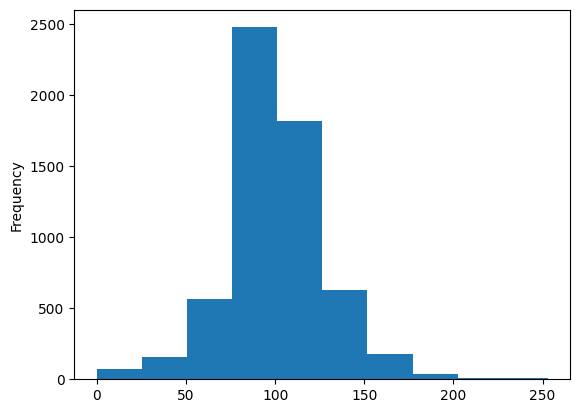

In [12]:
# plot histogram
df_movie['duration_min'].plot(
    kind='hist',
    bins=10 # specify the number of bins
)

In [13]:
# calculate how many values fall into specific ranges (bins) and then display those counts
df_movie['duration_min'].value_counts(bins=10).sort_index()

(-0.254, 25.3]      72
(25.3, 50.6]       157
(50.6, 75.9]       567
(75.9, 101.2]     2475
(101.2, 126.5]    1813
(126.5, 151.8]     631
(151.8, 177.1]     178
(177.1, 202.4]      34
(202.4, 227.7]      10
(227.7, 253.0]       6
Name: count, dtype: int64

<Axes: >

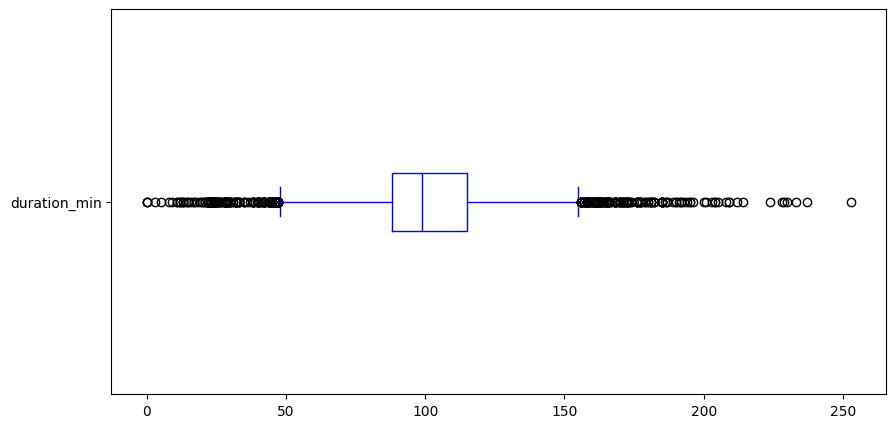

In [14]:
# Use boxplot to identify outliers within numeric data ('duration_min' column)
df_movie['duration_min'].plot(
    kind='box',
    vert=False, # covert boxplot to vertical position
    color='blue',
    figsize=(10, 5) # x: 10, y: 5
)

In [15]:
# calculate the range where outliers are located
# to get Q3 and Q1 use df_movie['duration_min'].describe() snippet

# IQR = Q3-Q1
q3 = 115
q1 = 88
iqr = q3 - q1

# min_boxplot = Q1 - 1.5*IQR
min_boxplot = q1 - (1.5 * iqr)
print(min_boxplot)

# max_boxplot = Q3 + 1.5*IQR
max_boxplot = q3 + (1.5 * iqr)
print(max_boxplot)

47.5
155.5


The outliers are movies that are shorter than 47.5 minutes and longer than 155.5 minutes.

In [16]:
# remove outliers, based on calculated outliers' range
df_movie[(df_movie['duration_min']>47.5) & (df_movie['duration_min']<155.5)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,120
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


<Axes: xlabel='rating'>

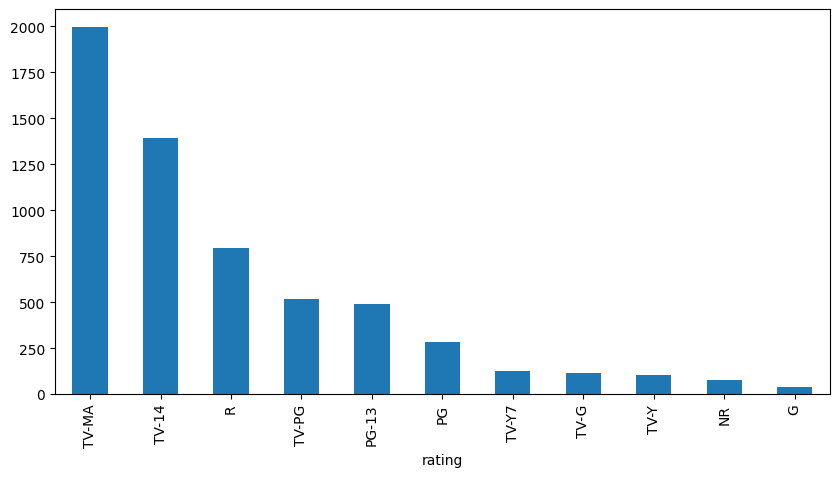

In [17]:
# use bars to identify outliers within categorical data
df_movie['rating'].value_counts()

# remove unwanted ratings
outlier_ratings = ['TV-Y7-FV', 'UR', 'NC-17', '74 min', '84 min', '66 min']
filtered_ratings = df_movie[~df_movie['rating'].isin(outlier_ratings)]

# plot bar chart
filtered_ratings['rating'].value_counts().plot(
    kind='bar', figsize=(10, 5)
)



#### 5 Text normalisation

In [ ]:
# inconsistent capitalisation: .lower(), .upper(), .title()
# update case of the text in column 'title' using .title() method
df_movie['title'] = df_movie['title'].str.title()

# # another method
# df_movie['title'] = df_movie['title'].apply(
#     lambda x:x.title()
# )

0                   Dick Johnson Is Dead
6       My Little Pony: A New Generation
7                                Sankofa
9                           The Starling
12                          Je Suis Karl
                      ...               
8801                             Zinzana
8802                              Zodiac
8804                          Zombieland
8805                                Zoom
8806                              Zubaan
Name: title, Length: 5943, dtype: object

In [28]:
# remove blank spaces using .strip()
df_movie['title'].str.strip()

0                   Dick Johnson Is Dead
6       My Little Pony: A New Generation
7                                Sankofa
9                           The Starling
12                          Je Suis Karl
                      ...               
8801                             Zinzana
8802                              Zodiac
8804                          Zombieland
8805                                Zoom
8806                              Zubaan
Name: title, Length: 5943, dtype: object

In [ ]:
# remove punctuation signs (:) with the str.replace() method and regex
df_movie['title'].str.replace(r'[^\w\s]', '', regex=True)

0                  Dick Johnson Is Dead
6       My Little Pony A New Generation
7                               Sankofa
9                          The Starling
12                         Je Suis Karl
                     ...               
8801                            Zinzana
8802                             Zodiac
8804                         Zombieland
8805                               Zoom
8806                             Zubaan
Name: title, Length: 5943, dtype: object

In [40]:
# remove punctuation signs with the re.sub() function via the apply method
import re
df_movie['title'].apply(
    lambda x: re.sub(r'[^\w\s]', '', x)
)


0                  Dick Johnson Is Dead
6       My Little Pony A New Generation
7                               Sankofa
9                          The Starling
12                         Je Suis Karl
                     ...               
8801                            Zinzana
8802                             Zodiac
8804                         Zombieland
8805                               Zoom
8806                             Zubaan
Name: title, Length: 5943, dtype: object